# Unsupervised Machine Learning Challenge

In [3]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Part 1: Prepare the Data

In [4]:
file_path = Path("Resources/myopia.csv")
myopia_df = pd.read_csv(file_path)
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [6]:
myopia_df['MYOPIC'].unique()

array([1, 0], dtype=int64)

In [8]:
preped_myopia_df = myopia_df.drop(["MYOPIC"], axis='columns')
labels = myopia_df['MYOPIC']

preped_myopia_df.head(15)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0


In [11]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(preped_myopia_df)

In [22]:
scaled_data[0]

array([-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
       -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
        0.18405806,  0.49830393,  0.98713773,  1.0032415 ])

In [12]:
scaled_data.shape

(618, 14)

# Part 2: Apply Dimensionality Reduction

In [29]:
pca = PCA(n_components=0.90)

myopia_pca = pca.fit_transform(scaled_data)



In [25]:
myopia_pca

array([[ 12.13805926,  31.63621189,  -4.52662538],
       [-15.26836285,  -6.09569473,   1.2070745 ],
       [-11.66223916,   3.75510503,   2.80821178],
       ...,
       [-23.15630411,  -1.33725918,  -1.15176635],
       [ -2.26448079,   1.09638499,   6.45876893],
       [-10.35437728,  14.58755696,   1.55768903]])

In [26]:
pca.explained_variance_ratio_

array([0.72557249, 0.16081428, 0.07227215])

In [30]:
PCA_df = pd.DataFrame(myopia_pca)
PCA_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


How did the number of the features change?

When applying the PCA function the number of input features reduced from 14 features to 10, whiich in result preserved 90% of the explained variance in dimensionality reduction.

In [33]:
tsne = TSNE(learning_rate=150)
tsne_features = tsne.fit_transform(PCA_df)

tsne_features.shape

C:\Users\Jvill\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(618, 2)

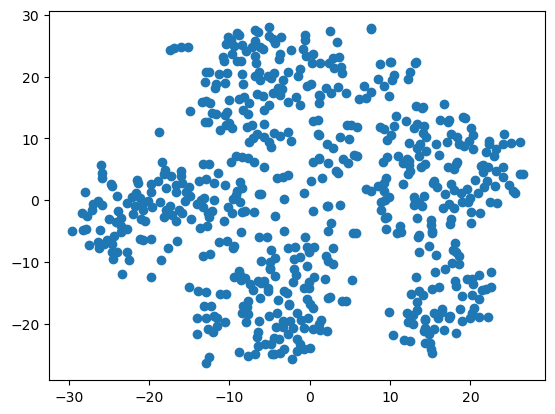

In [34]:
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

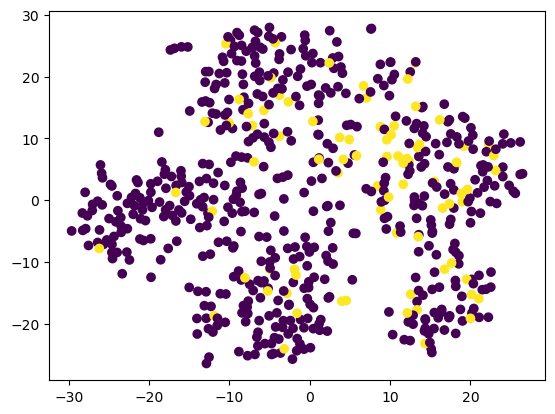

In [35]:
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=labels)
plt.show()

Based off the graph above there are approximatley 5 clusters

# Part 3: Perform a Cluster Analysis with K-means

In [38]:
inertia = []
k = list(range(1, 11))

for i in k:
    KM_model = KMeans(n_clusters=i, random_state=0)
    KM_model.fit(PCA_df)
    inertia.append(KM_model.inertia_)
    
elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)
elbow_df.head()

C:\Users\Jvill\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589


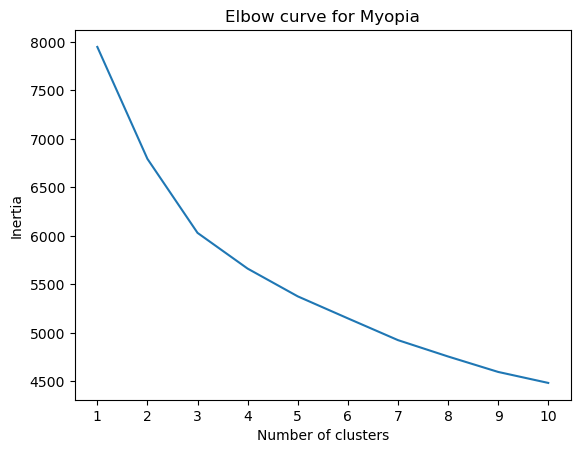

In [40]:
plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Myopia')
plt.show()

According to the graph above, the elbow plot is at K=3

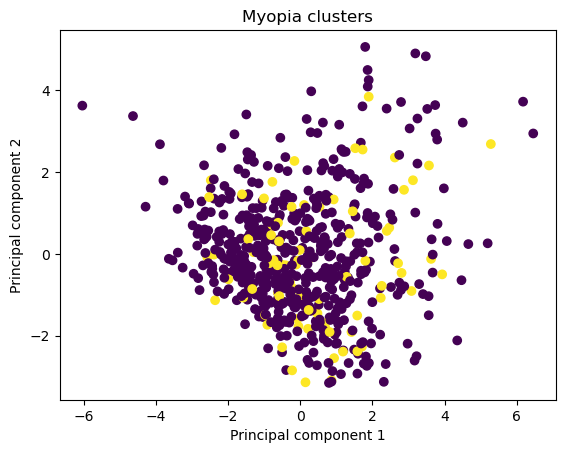

In [42]:
plt.scatter(x=PCA_df[0], y=PCA_df[1], c=labels)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Myopia clusters')
plt.show()

# Part 4: Make a Recommendation

Based off the results from using the Dimensionality Reduction with PCA, there is variance in the first 3 features, when applying the t-SNE feature it is seprated into 5 clusters on the scatter plot. However once configuring the data into an elbow plot we can determine that the elbow bends at K=3. Meaning that any clusters after 3 are inconsequential. Inconclusion it is best to analyze the patients seperately as you can see in the charts provided.